In [1]:
import matplotlib.pyplot as plt
import matplotlib.collections
import pandas as pd 
import numpy as np
np.set_printoptions(threshold=np.inf)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv

# White Wine

### read the data

In [2]:
import pandas as pd 
data = pd.read_csv("clean_white.csv")
data.head()

,'fixed acidity','volatile acidity','citric acid','residual sugar',chlorides,'free sulfur dioxide','total sulfur dioxide',density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.isna().sum()

'fixed acidity'           0
'volatile acidity'        0
'citric acid'             0
'residual sugar'          0
chlorides                 0
'free sulfur dioxide'     0
'total sulfur dioxide'    0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [4]:
X = data.drop(["quality"], axis=1)
y = data["quality"] 

## Oversampling the data

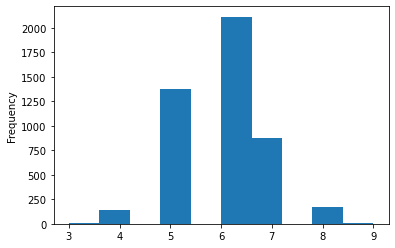

In [5]:
y.plot.hist()

In [6]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(X, y)
oversampled_data = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)


In [7]:
oversampled_data.to_csv('oversampled_clean_data_white.csv', index=False)

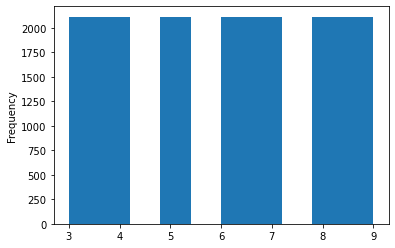

In [8]:
oversampled_data['quality'].plot.hist()

### normalize the data useing z-score

In [9]:
mean = oversampled_X.mean()
std = oversampled_X.std()
normalized_X = (oversampled_X - mean)/std
normalized_X.head()

,'fixed acidity','volatile acidity','citric acid','residual sugar',chlorides,'free sulfur dioxide','total sulfur dioxide',density,pH,sulphates,alcohol
0,-0.041766,-0.228297,0.180652,3.444662,0.349001,0.848081,0.971626,2.719592,-1.531030,-0.244878,-1.580886
1,-0.809388,0.104568,-0.019343,-0.905549,0.697840,-1.071934,0.076138,0.192913,0.622865,0.146203,-1.043260
2,1.164499,-0.117342,0.580642,0.301578,0.785050,-0.080958,-0.748653,0.589962,0.335679,-0.342648,-0.582437
3,0.177555,-0.672116,-0.219339,0.665993,1.482728,0.971953,1.348674,0.770440,-0.166896,-0.733728,-0.736044
4,0.177555,-0.672116,-0.219339,0.665993,1.482728,0.971953,1.348674,0.770440,-0.166896,-0.733728,-0.736044


### split the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, oversampled_Y, test_size=0.18, random_state=42)

In [11]:
train_normalized_data = X_train.copy()
train_normalized_data['quality'] = y_train

test_normalized_data = X_test.copy()
test_normalized_data['quality'] = y_test
normalized_data = pd.concat([train_normalized_data, test_normalized_data])
normalized_data.to_csv('normalized_clean_data_white.csv', index=False)

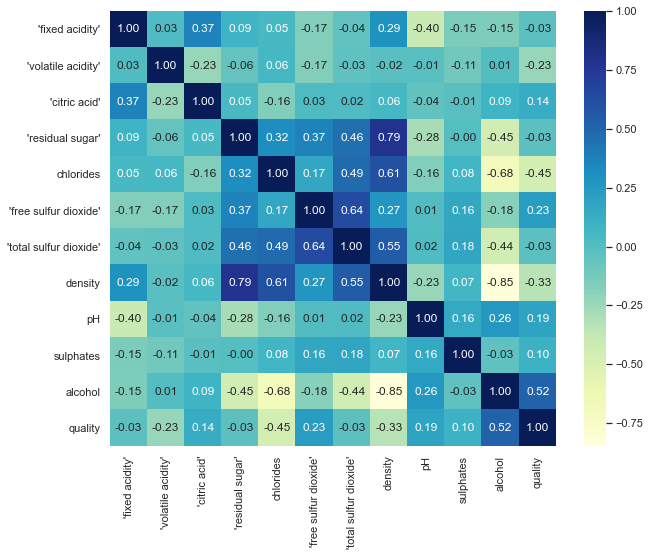

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = oversampled_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

# Red Wine

### read the data

In [13]:
import pandas as pd 
data = pd.read_csv("clean_red.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
X = data.drop(["quality"], axis=1)
y = data["quality"] 

## Oversampling the data

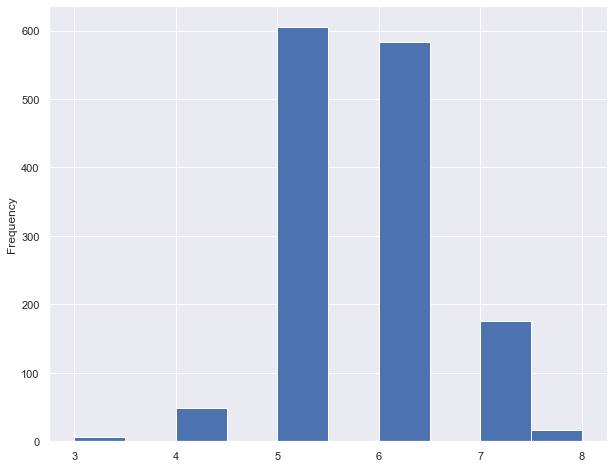

In [16]:
y.plot.hist()

In [17]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(X, y)
oversampled_data = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)


In [18]:
oversampled_data.to_csv('oversampled_clean_data_red.csv', index=False)

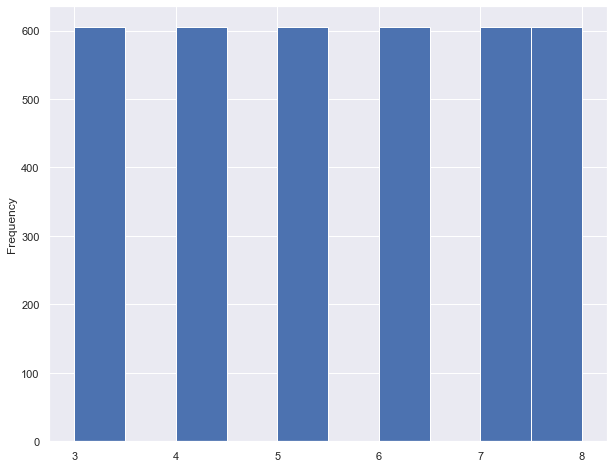

In [19]:
oversampled_data['quality'].plot.hist()

### normalize the data useing z-score

In [20]:
mean = oversampled_X.mean()
std = oversampled_X.std()
normalized_X = (oversampled_X - mean)/std
normalized_X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.595547,0.606531,-1.373394,-0.691310,-0.177860,-0.315541,-0.121899,0.686558,1.156418,-0.736539,-1.154881
1,-0.352949,1.413633,-1.373394,0.416007,1.168912,1.142569,1.121499,0.155098,-0.863201,0.153999,-0.802341
2,-0.352949,0.875565,-1.171828,-0.058558,0.801611,0.101062,0.631675,0.261390,-0.472307,-0.068635,-0.802341
3,1.709128,-1.276706,1.448534,-0.691310,-0.239076,0.309364,0.857748,0.792850,-1.123797,-0.588116,-0.802341
4,-0.595547,0.606531,-1.373394,-0.691310,-0.177860,-0.315541,-0.121899,0.686558,1.156418,-0.736539,-1.154881


### split the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, oversampled_Y, test_size=0.18, random_state=42)

In [22]:
train_normalized_data = X_train.copy()
train_normalized_data['quality'] = y_train

test_normalized_data = X_test.copy()
test_normalized_data['quality'] = y_test
normalized_data = pd.concat([train_normalized_data, test_normalized_data])
normalized_data.to_csv('normalized_clean_data_red.csv', index=False)

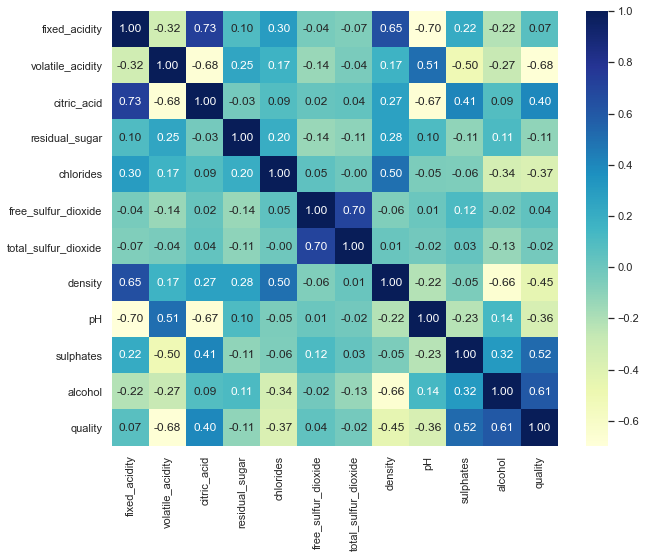

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = oversampled_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

# Normalize not Over Sampled

In [26]:
data = pd.read_csv("clean_white.csv")

copy = data.drop(['quality'], axis=1).copy()
quality = data['quality']
mean = copy.mean()
std = copy.std()
normalized_X = (copy - mean)/std

normalized_data = normalized_X.copy()
normalized_data['quality'] = quality
normalized_data.head()
normalized_data.to_csv('normalized_unoversampled_clean_data_white.csv', index=False)

In [27]:
data = pd.read_csv("clean_red.csv")

copy = data.drop(['quality'], axis=1).copy()
quality = data['quality']
mean = copy.mean()
std = copy.std()
normalized_X = (copy - mean)/std

normalized_data = normalized_X.copy()
normalized_data['quality'] = quality
normalized_data.head()
normalized_data.to_csv('normalized_unoversampled_clean_data_red.csv', index=False)